In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Increase the maximum number of rows and columns displayed
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows


# Load the dataset
lifestyle_data = pd.read_csv('datasets/lifestyle_dataset.csv')

# Drop 'Patient ID' as it's a unique identifier and not relevant for correlation analysis
lifestyle_data = lifestyle_data.drop(['Patient ID'], axis=1)

# Split 'Blood Pressure' into two columns (Systolic and Diastolic)
lifestyle_data[['Systolic', 'Diastolic']] = lifestyle_data['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns into numeric types
lifestyle_data['Systolic'] = pd.to_numeric(lifestyle_data['Systolic'])
lifestyle_data['Diastolic'] = pd.to_numeric(lifestyle_data['Diastolic'])

# Now drop the original 'Blood Pressure' column
lifestyle_data = lifestyle_data.drop(['Blood Pressure'], axis=1)

# One-hot encode categorical columns
lifestyle_data = pd.get_dummies(lifestyle_data, columns=['Sex', 'Smoking', 'Obesity', 'Diet', 'Diabetes', 'Family History', 'Continent', 'Hemisphere'], drop_first=True)

# Drop 'Country' if it has been replaced by 'Continent'
lifestyle_data = lifestyle_data.drop(['Country'], axis=1)


# Check the cleaned data
# print(lifestyle_data.head())


# Preprocessing the lifestyle dataset by dropping the output column
X_unencoded = lifestyle_data.drop('Heart Attack Risk', axis=1)
y = lifestyle_data['Heart Attack Risk']

X = pd.get_dummies(X_unencoded, drop_first=True)  # Convert categorical features to numeric



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display rows 0 to 10 and the first 10 columns
print(lifestyle_data.iloc[0:10, 15:20])


   Systolic  Diastolic  Sex_Male  Smoking_1  Obesity_1
0       158         88      True       True      False
1       165         93      True       True       True
2       174         99     False      False      False
3       163        100      True       True      False
4        91         88      True       True       True
5       172         86     False       True      False
6       102         73      True       True      False
7       131         68      True       True       True
8       144        105      True       True       True
9       160         70     False       True       True


In [60]:
# Preprocessing the lifestyle dataset by dropping the output column
X_unencoded = lifestyle_data.drop('Heart Attack Risk', axis=1)
y = lifestyle_data['Heart Attack Risk']

X = pd.get_dummies(X_unencoded, drop_first=True)  # Convert categorical features to numeric



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Summary of cleaning

1. Columns to One-Hot Encode:
These are categorical variables that contain useful information and can be converted to numeric values using one-hot encoding.

Sex: This is a binary categorical feature (Male/Female). One-hot encoding or binary encoding is appropriate.
Smoking: Binary categorical feature (Smoker/Non-smoker). One-hot encode.
Obesity: Binary feature (Obese/Not Obese). One-hot encode.
Diabetes: Binary feature (Has diabetes/No diabetes). One-hot encode.
Family History: Binary feature (Yes/No). One-hot encode.
Continent: This column likely has multiple categories (e.g., Asia, Europe, etc.). One-hot encoding is recommended here to preserve geographic insights.
Hemisphere: This is probably a binary feature (Northern/Southern Hemisphere). One-hot encode.
2. Columns to Drop:
These columns either have unique values or may not provide useful insights for the correlation analysis.

Patient ID: This is a unique identifier for each patient and should be dropped. It does not contribute to statistical analysis.
Blood Pressure: Since it's currently stored as a string (e.g., '158/88'), you can either:
Split into Systolic and Diastolic: As I suggested earlier, this column can be split into two numeric columns for better analysis.
Drop if not needed: If you prefer not to deal with splitting this column, you can drop it.
Country: Depending on the number of unique values, this column can either be one-hot encoded or dropped. If it has too many categories, consider grouping it into fewer categories like Continent, which is more manageable.
Income: This is a continuous variable, so no encoding is necessary.
3. Columns Already Numeric:
These columns don't need encoding and should be retained for the correlation matrix.

Age: Numeric, retain as is.
Cholesterol: Numeric, retain as is.
Heart Rate: Numeric, retain as is.
Alcohol Consumption: Numeric, retain as is.
Exercise Hours Per Week: Numeric, retain as is.
Previous Heart Problems: Binary numeric (0/1), retain as is.
Medication Use: Binary numeric (0/1), retain as is.
Stress Level: Numeric, retain as is.
Sedentary Hours Per Day: Numeric, retain as is.
BMI: Numeric, retain as is.
Triglycerides: Numeric, retain as is.
Physical Activity Days Per Week: Numeric, retain as is.
Sleep Hours Per Day: Numeric, retain as is.
Heart Attack Risk: Binary numeric (0/1), retain as is.


Summary Statistics: Use .describe() to get the mean, standard deviation, min, max, and quartiles for each feature.

In [61]:
lifestyle_data.describe()


,Age,Cholesterol,Heart Rate,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


Check for Outliers: Extreme values in features (e.g., abnormally high or low values) can affect model performance. Visualize outliers using box plots.

<Axes: >

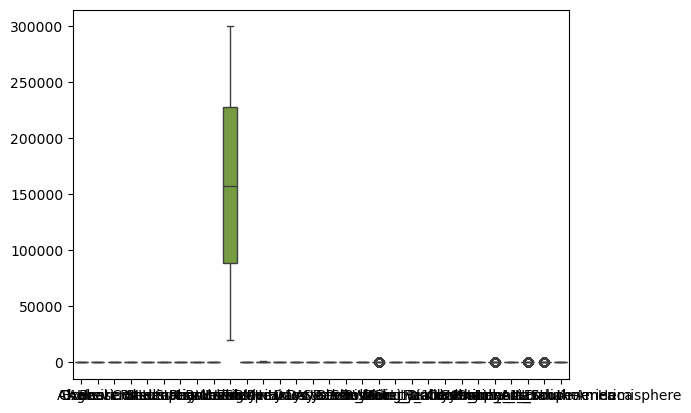

In [62]:
import seaborn as sns
sns.boxplot(data=lifestyle_data)

Distribution of Target Variable: Check how the target variable (Heart Attack Risk) is distributed. If it is imbalanced (e.g., many more low-risk cases than high-risk), it might be problematic.

In [63]:
lifestyle_data['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

Check for Missing Data: Missing data can impact model performance if not handled properly. Use .isnull() to see how much missing data there is.

In [64]:
lifestyle_data.isnull().sum()


Age                                0
Cholesterol                        0
Heart Rate                         0
Alcohol Consumption                0
Exercise Hours Per Week            0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
Systolic                           0
Diastolic                          0
Sex_Male                           0
Smoking_1                          0
Obesity_1                          0
Diet_Healthy                       0
Diet_Unhealthy                     0
Diabetes_1                         0
Family History_1                   0
Continent_Asia                     0
Continent_Australia                0
Continent_Europe                   0
C

Correlation Matrix: Use the correlation matrix to check how features are correlated with each other and with the target variable (Heart Attack Risk). This helps identify if certain features are redundant (multicollinearity) or highly correlated with the target variable (important predictors).

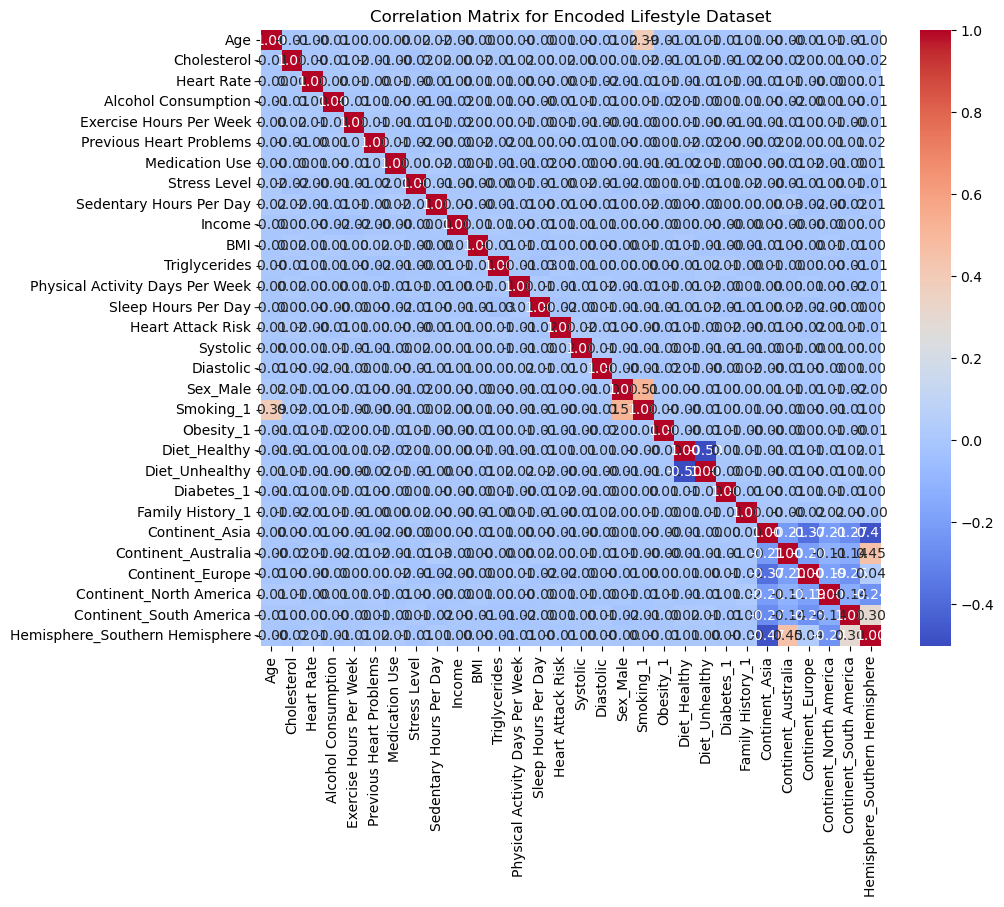

correlated pairs (above 0.1):
Sex_Male                        Smoking_1                         0.514837
Smoking_1                       Sex_Male                          0.514837
Hemisphere_Southern Hemisphere  Continent_Australia               0.452385
Continent_Australia             Hemisphere_Southern Hemisphere    0.452385
Age                             Smoking_1                         0.394891
Smoking_1                       Age                               0.394891
Hemisphere_Southern Hemisphere  Continent_South America           0.296838
Continent_South America         Hemisphere_Southern Hemisphere    0.296838
dtype: float64


In [78]:
# The full dataset takes too long 

# corr_matrix = lifestyle_data_encoded.corr()
# sns.heatmap(corr_matrix, annot=True)
# Load the dataset

import matplotlib.pyplot as plt  # 

# Calculate the correlation matrix
corr_matrix_encoded = lifestyle_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_encoded, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix for Encoded Lifestyle Dataset')
plt.show()


# Define the threshold for high correlation (greater than 0.75)
threshold = 0.1

# Filter the correlation matrix for correlations greater than the threshold
high_corr_pairs = corr_matrix_encoded.unstack().sort_values(kind="quicksort", ascending=False)

# Filter for pairs where correlation is > 0.0.1 and ignore self-correlations
high_corr_pairs = high_corr_pairs[(high_corr_pairs > threshold) & (high_corr_pairs.index.get_level_values(0) != high_corr_pairs.index.get_level_values(1))]

# Display the pairs with correlation greater than 0.0.1
print("correlated pairs (above 0.1):")
print(high_corr_pairs)


Our analysis shows that none of the features in the dataset exhibit a correlation coefficient greater than 0.1 with heart attack risk, indicating that there are no strong linear relationships between individual features and the target variable. This suggests that heart attack risk may be influenced by non-linear relationships, combinations of factors (interaction effects), or other complex patterns not captured by simple correlation. Additionally, moderate correlations were found between features such as Sex (Male) and Smoking, and Hemisphere and Continent, which reflect patterns that could indicate some feature redundancy but do not directly influence heart attack risk. This lack of strong correlation suggests that more advanced modeling techniques, such as non-linear models (e.g., decision trees, random forests), or feature engineering to capture interaction effects, may be needed to better predict heart attack risk.

Multicollinearity Check: If features are highly correlated with each other, it might confuse some models like Logistic Regression. You can use Variance Inflation Factor (VIF) to detect multicollinearity.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

 Visualizing Data Distribution:
 Histograms: Visualize the distribution of each feature using histograms. Look for skewed distributions that might need transformation (e.g., log-transforming highly skewed data).

In [ ]:
lifestyle_data.hist(bins=20, figsize=(20, 15))


Density Plots: Use kernel density estimation (KDE) to understand the smooth distribution of data.

In [ ]:
sns.kdeplot(data=lifestyle_data, x="Age")

Pair Plots: If you have a smaller dataset, visualize relationships between features using pair plots. This can help identify outliers and correlations visually.

In [ ]:
sns.pairplot(lifestyle_data, hue='Heart Attack Risk')

Feature Importance Analysis:
Feature Correlation with Target: Use feature correlation with the target variable to identify which features are most predictive.


In [ ]:
corr_with_target = lifestyle_data.corr()['Heart Attack Risk'].sort_values(ascending=False)
print(corr_with_target)

Feature Importance from Random Forest: Train a Random Forest Classifier to get feature importance scores. This helps identify which features contribute the most to predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)


Class Imbalance Check:
Target Class Distribution: Check if the target variable is imbalanced. A highly imbalanced dataset (e.g., far more low-risk cases than high-risk) may lead to poor performance in classification models.

In [ ]:
sns.countplot(x='Heart Attack Risk', data=lifestyle_data)


PCA
Principal Component Analysis (PCA): If the dataset has many features, apply PCA to reduce dimensions and check if certain features explain the variance better. PCA also helps detect potential multicollinearity.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib as plt 


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance by principal components: ", pca.explained_variance_ratio_)


t-SNE: Use t-SNE (t-Distributed Stochastic Neighbor Embedding) to visualize high-dimensional data in 2D or 3D space. This technique helps detect clusters or patterns.

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2).fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()


 Model Diagnostics:
Cross-Validation: Use cross-validation to test the stability of your models across different folds and detect overfitting or underfitting.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores: ", scores)


Learning Curves: Plot learning curves to see how the model performance changes with the size of the training data. This helps detect overfitting (if the model performs much better on training data than on test data).

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score')
plt.legend()
plt.show()

9. Handling Categorical Data:
Explore Unique Categories: Ensure that categorical variables are properly encoded. Check the unique values of categorical columns to see if there are any unexpected categories.

In [ ]:
lifestyle_data['CategoryColumn'].unique()


 Outlier Detection:
 Z-Score: Detect potential outliers using Z-score for numerical features. A Z-score greater than 3 (or smaller than -3) is often considered an outlier.

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(lifestyle_data))
print(np.where(z_scores > 3))


Isolation Forest: Use machine learning techniques like Isolation Forest to detect outliers in the dataset.

In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(X)
print(outliers)
